# Baseline Correction

It is known that baseline correction is usually required for SEC-SAXS data. In this chapter, we will explain how to do it in Molass Library with one of the methods below.

* linear (default)
* uvdiff
* integral

```{note}
We won't explain the details of these methods here in this tutorial. See [Molass Technical Report](https://freesemt.github.io/molass-technical/) if necessary.
```

## Learning Points
* ssd.plot_compact(baseline=True)
* ssd.set_baseline_method('linear')
* ssd.set_baseline_method(('linear', 'uvdiff'))
* ssd.set_baseline_method('integral')
* ssd.get_baseline_method()
* ssd.corrected_copy()

## Linear Correction

By default, linear baseline is assumed. Before correction, you can confirm how it is determined with basseline option as follows.

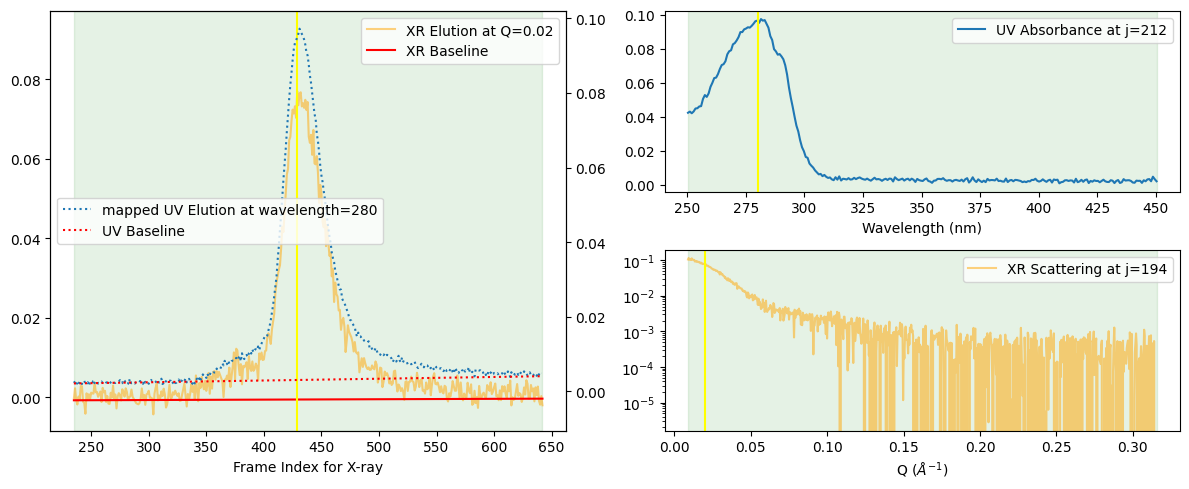

In [9]:
from molass import get_version
assert get_version() >= '0.2.0', "This tutorial requires molass version 0.2.0 or higher."
from molass_data import SAMPLE2
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE2)
trimmed_ssd = ssd.trimmed_copy()
trimmed_ssd.plot_compact(baseline=True);

Note that just plotting does not change the data set. Actual correction is performed by making a corrected copy of the object with the `corrected_copy` as shown below.

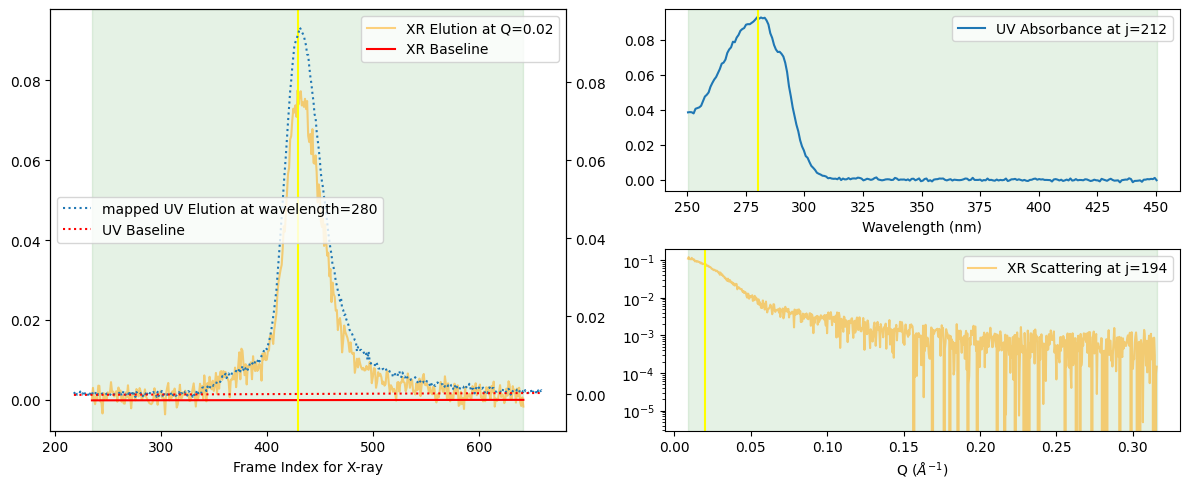

In [10]:
corrected_ssd = trimmed_ssd.corrected_copy()
corrected_ssd.plot_compact(baseline=True);

To change the correction method, you can use `set_baseline_method` with one of the following specifications.

```python
ssd.set_baseline_method('linear')    # default setting
ssd.set_baseline_method(('linear', 'uvdiff'))
ssd.set_baseline_method('integral')
```

## UV-specific Correction

From our experience, it is known that baselines for UV data are usually not linear. To address this peculiarity, you can change the method for UV data only as follows.

`set_baseline_method` interprets the first element of the tuple as the method for X-ray data and the second as the method for UV data.

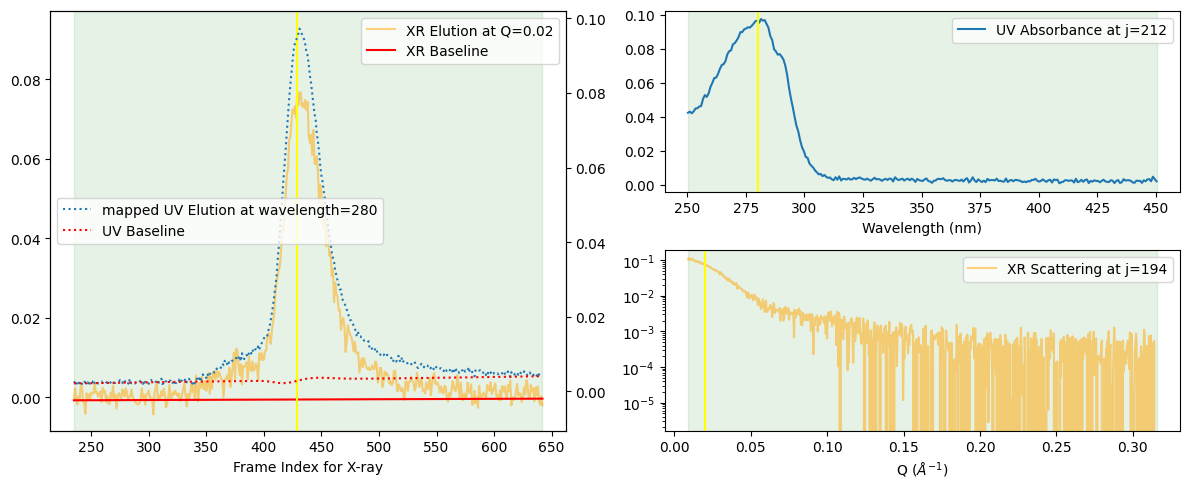

In [11]:
trimmed_ssd.set_baseline_method(('linear', 'uvdiff'))
trimmed_ssd.plot_compact(baseline=True);

This baseline method setting is retained with copies so that the following standard coding sequence works as expected.

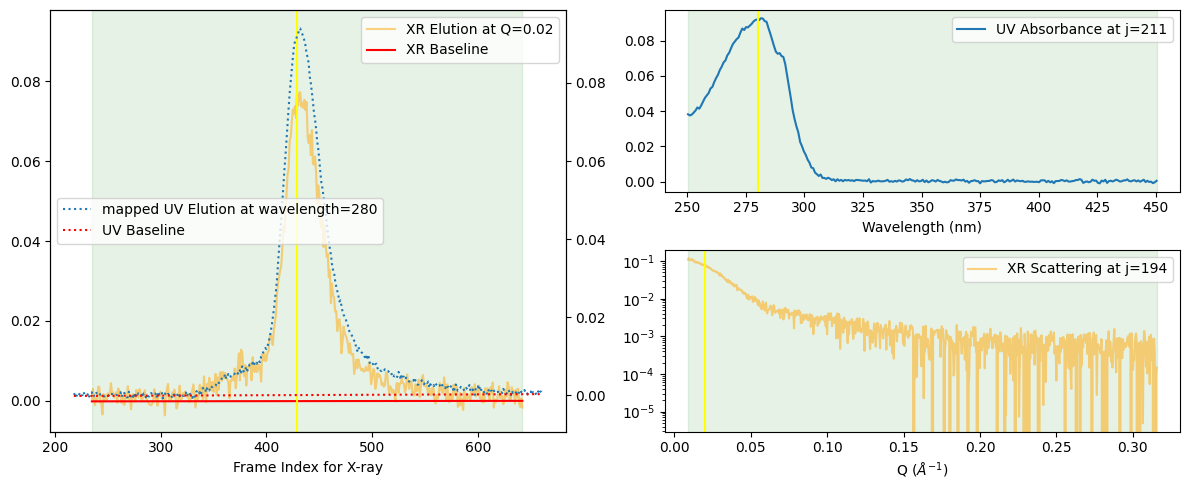

In [12]:
corrected_ssd = trimmed_ssd.corrected_copy()
corrected_ssd.plot_compact(baseline=True);

In [13]:
corrected_ssd.get_baseline_method()

('linear', 'uvdiff')

## Integral Correction

There is another established method which deals with the baseline drift due to the accumulation of fouling. The integral method can be activated by specifying `integral`.

To contrast the difference, compare the following plots resulted from `linear` and `integral` methods.

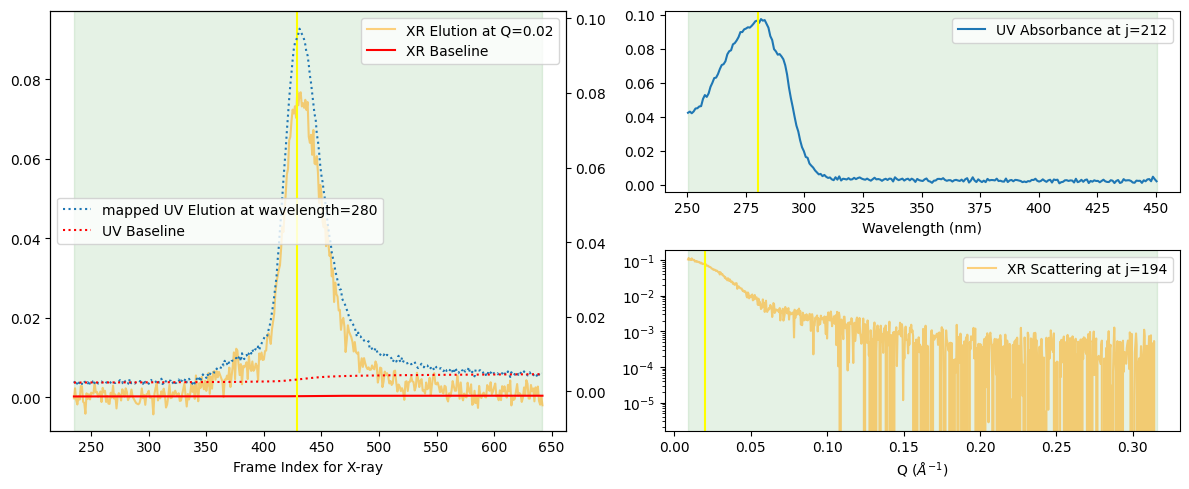

In [14]:
trimmed_ssd.set_baseline_method('integral')
trimmed_ssd.plot_compact(baseline=True);

The actual stardard correction procedure will be as follows.

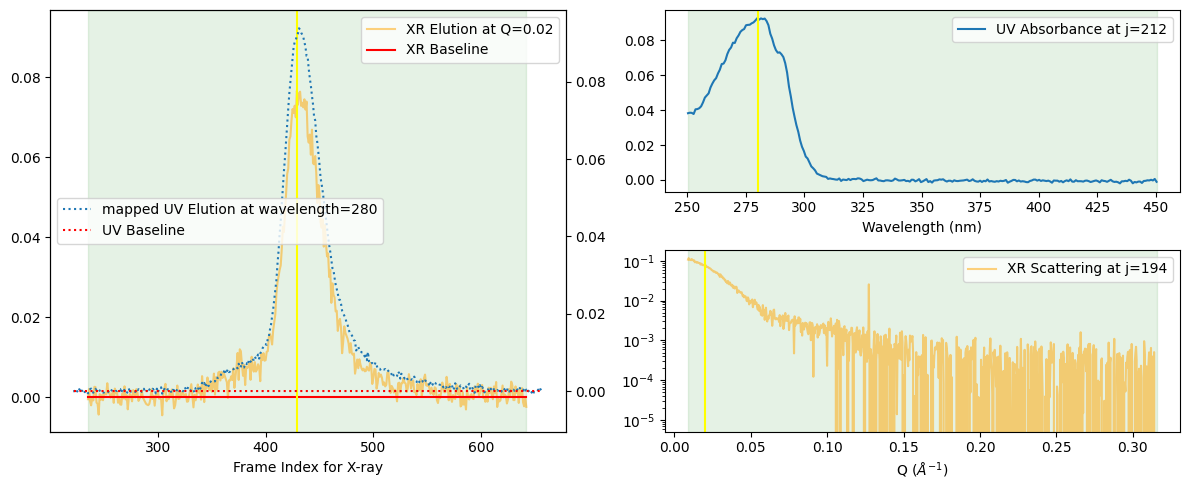

In [15]:
corrected_ssd = trimmed_ssd.corrected_copy()
corrected_ssd.plot_compact(baseline=True);

Note that the last specified (with ssd2) and retained (in trimmed_ssd2) method has been valid, which can be shown as follows (not default 'linear' in this case).

In [16]:
corrected_ssd.get_baseline_method()

'integral'